In [1]:
from bezier_utils.basic import extract_bezier_curves
from bezier_utils.linearity import is_approximately_linear_by_curvature
from bezier_utils.square_approx import draw_quadrilateral_with_square
import numpy as np
from scipy.spatial.distance import euclidean
import matplotlib.pyplot as plt
from geomutils.core import mediate_points, mediate_lines, create_polygon_lines, calculate_angle
from geomutils.display import plot_polygon, plot_arrows_between_points
from geomutils.polygons import order_points_clockwise, build_connection_map, get_all_points, remove_finder

In [2]:
c, q = extract_bezier_curves('data/problems/frag0.svg')
lines = []
for curve in c:
    if is_approximately_linear_by_curvature(curve, tolerance=0.01):
        lines.append(np.array([curve[0], curve[-1]]))
unmediated_points = []
for line in lines:
    unmediated_points.append(line[0])
    unmediated_points.append(line[1])
unmediated_points

[array([ 13.245, 227.755]),
 array([1.5, 1.5]),
 array([224.647, 215.68 ]),
 array([113.922, 231.367]),
 array([113.922, 231.367]),
 array([ 81.876, 233.579]),
 array([ 81.876, 233.579]),
 array([ 56.652, 231.915]),
 array([ 56.652, 231.915]),
 array([ 13.245, 227.755]),
 array([216.777,   2.107]),
 array([224.647, 215.68 ]),
 array([1.562, 1.876]),
 array([216.778,   2.107])]

In [3]:
mediated_points = mediate_points(unmediated_points, 0.5)
mediated_points

[array([ 13.245, 227.755]),
 array([1.531, 1.688]),
 array([224.647, 215.68 ]),
 array([113.922, 231.367]),
 array([ 81.876, 233.579]),
 array([ 56.652, 231.915]),
 array([216.7775,   2.107 ])]

In [4]:
mediated_lines = mediate_lines(lines, mediated_points)
mediated_lines

[array([[ 13.245, 227.755],
        [  1.531,   1.688]]),
 array([[224.647, 215.68 ],
        [113.922, 231.367]]),
 array([[113.922, 231.367],
        [ 81.876, 233.579]]),
 array([[ 81.876, 233.579],
        [ 56.652, 231.915]]),
 array([[ 56.652, 231.915],
        [ 13.245, 227.755]]),
 array([[216.7775,   2.107 ],
        [224.647 , 215.68  ]]),
 array([[  1.531 ,   1.688 ],
        [216.7775,   2.107 ]])]

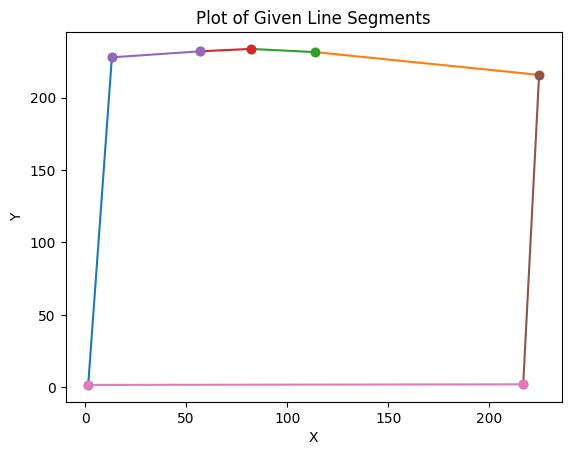

In [5]:
plot_polygon(mediated_lines)

In [6]:
connections = build_connection_map(mediated_lines)
points = get_all_points(mediated_lines)

In [7]:
ordered_points = order_points_clockwise(points, connections)
ordered_points

[(216.7775, 2.107),
 (224.647, 215.68),
 (113.922, 231.36700000000002),
 (81.876, 233.579),
 (56.652, 231.91500000000002),
 (13.245000000000001, 227.755),
 (1.5310000000000001, 1.688)]

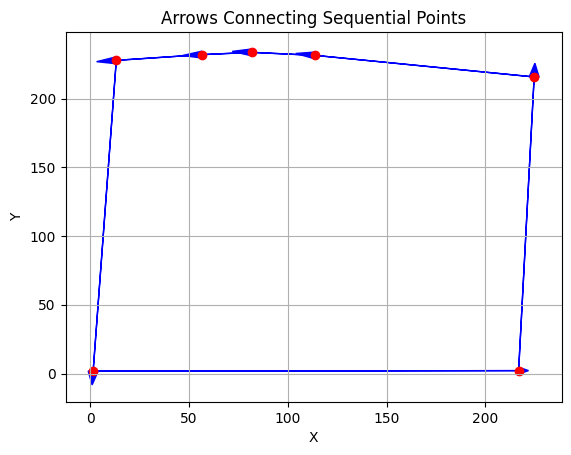

In [8]:
plot_arrows_between_points(ordered_points)

In [9]:
remove_vertices = remove_finder(ordered_points)
remove_vertices

[(113.922, 231.36700000000002),
 (81.876, 233.579),
 (56.652, 231.91500000000002)]

In [10]:
def remove_elements(list1, list2):
    set2 = set(list2)
    result = [item for item in list1 if item not in set2]
    return result

In [11]:
flattened_ordered_points = remove_elements(ordered_points, remove_vertices)
flattened_ordered_points

[(216.7775, 2.107),
 (224.647, 215.68),
 (13.245000000000001, 227.755),
 (1.5310000000000001, 1.688)]

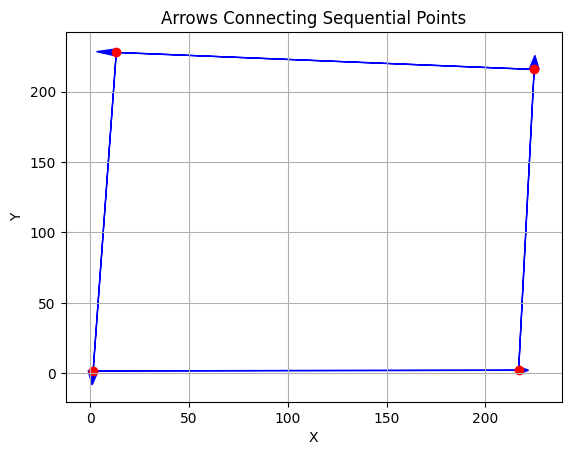

In [12]:
plot_arrows_between_points(flattened_ordered_points)

In [13]:
flattened_polygon = create_polygon_lines(flattened_ordered_points)

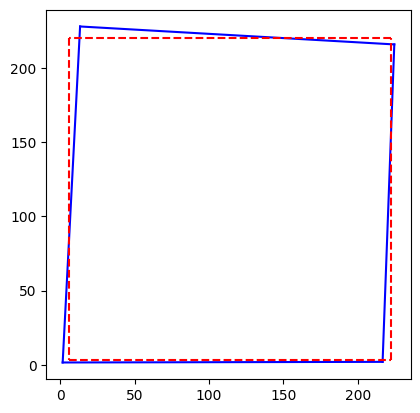

In [14]:
draw_quadrilateral_with_square(flattened_polygon)